David López Valdivia y Jimena de Prado González

# SEMANA 1

- Empezamos importando las librerías que vamos a usar y el dataset

In [2]:
import numpy as np, pandas as pd, seaborn as sns
import scipy
from matplotlib import pyplot as plt
pd.set_option.display_maxcolumns = 100
data = pd.read_csv('fuga_clientes_empresa_telefonica_construccion.csv')
data_explot=pd.read_csv('fuga_clientes_empresa_telefonica_construccion.csv')




## 1.1 Limpieza del dataset

- Vamos a empezar indicando que variables tienen valores nulos y cuáles tienen outliers para facilitar el preprocesado. 

Haremos la partición de train y test al final del preprocesado para evitar más lineas de las necesarias, ya que todas las modificaciones que aplicamos son válidas para ambos conjuntos. Una vez creemos test haremos algún cambio adicional sobre este, como borrar Churn Status.

#### <span style='color:steelblue'> Valores nulos: </span>

In [3]:
data.isnull().sum()

Customer ID                                  0
network_age                                  0
Customer tenure in month                     0
Total Spend in Months 1 and 2 of 2017        0
Total SMS Spend                              0
Total Data Spend                             0
Total Data Consumption                       0
Total Unique Calls                           0
Total Onnet spend                            0
Total Offnet spend                           0
Total Call centre complaint calls            0
Network type subscription in Month 1         0
Network type subscription in Month 2        22
Most Loved Competitor network in Month 1     1
Most Loved Competitor network in Month 2     1
Churn Status                                 0
dtype: int64

#### <span style='color:steelblue'> Outliers: </span>

In [4]:
#Función para detectar outliers:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
#Tomamos solo las variables numéricas
data_numericos = data.loc[:, data.dtypes != object]
is_outlier_IQR(data_numericos).sum()

network_age                                5
Customer tenure in month                   5
Total Spend in Months 1 and 2 of 2017     62
Total SMS Spend                          111
Total Data Spend                         114
Total Data Consumption                   157
Total Unique Calls                       101
Total Onnet spend                        120
Total Offnet spend                       145
Total Call centre complaint calls        124
Churn Status                               0
dtype: int64

### a) Customer ID

- Esta variable representa los ID de todos los clientes, veamos sus valores únicos para comprobarlo:

In [5]:
data['Customer ID'].unique()

array(['ADF0039', 'ADF0040', 'ADF0041', ..., 'ADF1998', 'ADF1999',
       'ADF2000'], dtype=object)

- Como esta variable no es relevante podemos eliminarla

In [6]:
data= data.drop('Customer ID', axis = 1)

### b) network_age

Esta variable numérica informa sobre ...... .Nos encontramos 5 outliers

In [7]:
print('Número de outliers:',is_outlier_IQR(data['network_age']).sum())
print('Numero de valores nulos:',data['network_age'].isnull().sum())

Número de outliers: 5
Numero de valores nulos: 0


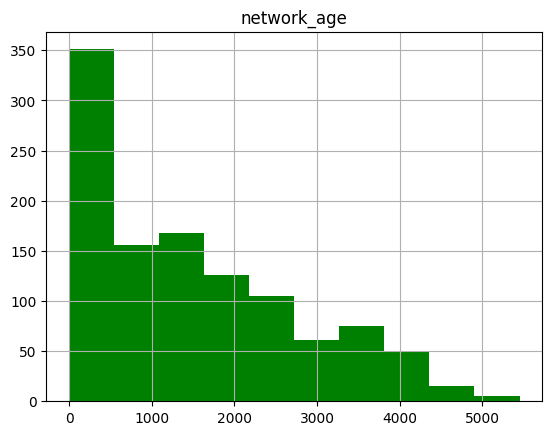

In [8]:
fig, ax = plt.subplots(1, 1) 
ax.hist(data['network_age'],color = "green") 
  
ax.set_title("network_age")
plt.grid()
plt.show()

### c) Customer tenure in month

In [9]:
data['Customer tenure in month'].value_counts()

Customer tenure in month
3.90      7
3.67      6
4.17      5
4.00      4
3.57      4
         ..
20.87     1
107.10    1
23.97     1
73.83     1
31.23     1
Name: count, Length: 883, dtype: int64

- Por sus valores se puede deducir que se trata de una variable numérica representa los meses que lleva un cliente en la compañía

- Recordemos que esta columna tenía 5 outliers, veamos cuales son sus valores

In [10]:
outliermth = data['Customer tenure in month'][is_outlier_IQR(data['Customer tenure in month'])]
outliermth

8      177.80
172    172.60
208    181.70
353    172.70
484    179.13
Name: Customer tenure in month, dtype: float64

- Consideremos la posibilidad de que pueda tener una distribución de cola pesada

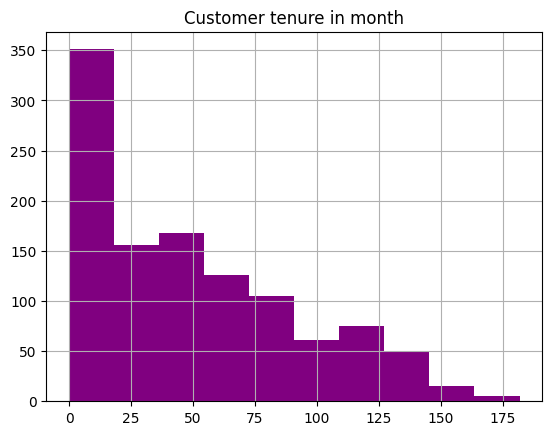

In [11]:
fig, ax = plt.subplots(1, 1) 
ax.hist(data['Customer tenure in month'],color = "purple") 
  
ax.set_title("Customer tenure in month")
plt.grid()
plt.show()

- Como así es, realicemos un ajuste logarítmico para ver si dejamos de tener outliers

In [12]:
log = np.log10(data['Customer tenure in month']+1)

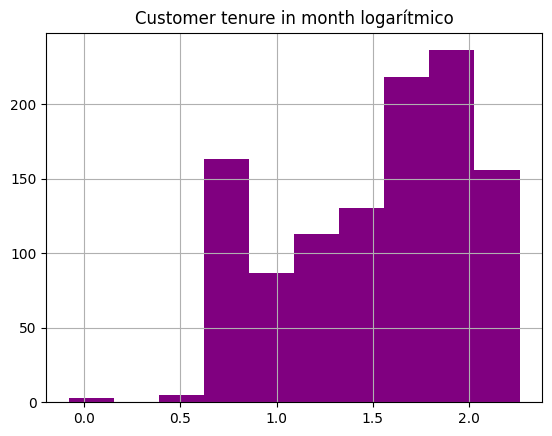

In [13]:
fig, ax = plt.subplots(1, 1) 
ax.hist(log,color = "purple") 
  
ax.set_title("Customer tenure in month logarítmico")
plt.grid()
plt.show()

### d) Total Spend in Months 1 and 2 of 2017

In [14]:
print('Número de outliers:',is_outlier_IQR(data['network_age']).sum())
print('Número de valores nulos:',data['network_age'].isnull().sum())

Número de outliers: 5
Número de valores nulos: 0


Esta variable nos hablar de

### e) Total SMS Spend

In [15]:
data['Total SMS Spend'].value_counts()

Total SMS Spend
0.00     163
1.75      42
3.50      20
0.01      19
5.25      18
        ... 
56.72      1
35.32      1
26.18      1
9.49       1
32.40      1
Name: count, Length: 601, dtype: int64

- Por estos valores podemos deducir que se trata del gasto en mensajes SMS de cada cliente 

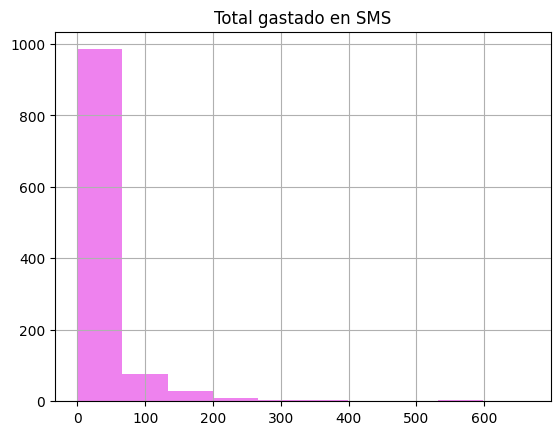

In [16]:
fig, ax = plt.subplots(1, 1) 
ax.hist(data['Total SMS Spend'],color = "violet") 
  
ax.set_title('Total gastado en SMS')
plt.grid()
plt.show()

- Veamos si con una distribución logarítmica podemos tartar el problema de los outliers

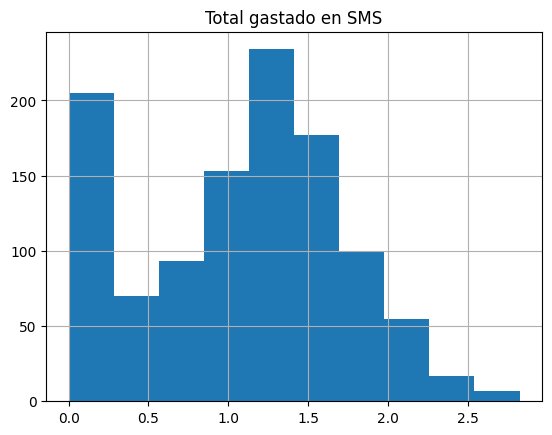

In [17]:
fig, ax = plt.subplots(1, 1) 
ax.hist(np.log10(data['Total SMS Spend']+1) )
  
ax.set_title('Total gastado en SMS')
plt.grid()
plt.show()

### f) Total Data Spend

### g) Total Data Consumption

In [18]:
data['Total Data Consumption'].unique()

array([1.47383000e+01, 8.34497342e+07, 7.11599229e+04, ...,
       1.31274587e+05, 2.16600627e+06, 1.82811500e+02])

** Es numérica la dejamos de momento

### h) Total Unique Calls

### i) Total Onnet spend

In [19]:
data['Total Onnet spend'].unique()

array([  2940,      0,    131,    696,  18635,   5532,    600,   2892,
        15225,   1428,   2155,    120,  10578,  17184,  10305,   1470,
        13980,    885,   7260,   2832,     60,    480,   1024,    906,
          228,     24,    168,    888,  38778,  10255,    486,  24828,
         1254,  31601,   2710,    502,  11478,   1908,     12,  75699,
          564,   3024,  10516,   5080,    275,  24450,   5271,  11378,
          813,  18100,   4744,    992,   1092,   5713,    804,   4338,
          558,   1304,  49351,   5568,  10008,    324,  55390,   5287,
         1506,   2799,   9395,   1829,   5472,  71208,   3387,  12324,
          287,    216,  48720,   2850,    970,  16087,    753,  64872,
         4131,    526,   4584,   4853,   8928,   2421,    738,   1243,
         4569,   5634,    570,    132,   7608,  18603,   9666,   2700,
         2268,   3452,   4434,   8856,  17408,   2634,  10137,   1248,
        18157,    610,  15228,   7852,  37401,   4260,   8608,    240,
      

** Es numérica lo dejas hasta hacer el modelo 

### j) Total Offnet spend

### k) Total Call centre complaint calls

In [20]:
data['Total Call centre complaint calls'].unique()

array([ 4,  2,  1,  3,  5, 13, 12,  6, 14,  8, 16,  7, 11, 21, 10,  9, 18,
       15, 49], dtype=int64)

** Es numérica siguiente

### l)Network type subscription in Month 1

Variable categórica que nos indica el tipo de suscripción en el primer mes.

In [21]:
data = pd.get_dummies(data, columns=['Network type subscription in Month 1'], dtype= int, drop_first= True)
data_explot = pd.get_dummies(data_explot, columns=['Network type subscription in Month 1'], dtype= int, drop_first= True)

# Tratamos los valores nulos antes de seguir con el modelo. Probamos, y luego volvemos por si tenemos que tratar outliers

### m) Network type subscription in Month 2

- Representa el tipo de red a la que se suscribió el cliente en el segundo mes. Veamos los valores nulos

In [22]:
data['Network type subscription in Month 2'].unique()

array(['2G', '3G', 'Other', nan], dtype=object)

In [23]:
data['Network type subscription in Month 2'][data['Network type subscription in Month 2'].isnull() == True]

38      NaN
160     NaN
198     NaN
203     NaN
227     NaN
419     NaN
428     NaN
439     NaN
519     NaN
523     NaN
537     NaN
590     NaN
600     NaN
619     NaN
655     NaN
664     NaN
679     NaN
731     NaN
761     NaN
866     NaN
943     NaN
1032    NaN
Name: Network type subscription in Month 2, dtype: object

- Hacemos la codificación 'one-hot'

In [24]:
data = pd.get_dummies(data, columns=['Network type subscription in Month 2'], dtype= int)
data_explot= pd.get_dummies(data_explot, columns=['Network type subscription in Month 2'], dtype= int, drop_first= True)

- Drop_first pero para el valor 'other'

In [25]:
data = data.drop('Network type subscription in Month 2_Other', axis=1)

### n) Most Loved Competitor network in in Month 1

Variable categórica ordenada que nos informa del trabajador de la compañía más gustado por el cliente en el primer mes.

In [26]:
data= pd.get_dummies(data, columns=['Most Loved Competitor network in Month 1'], dtype= int, drop_first= True)
data_explot = pd.get_dummies(data_explot, columns=['Most Loved Competitor network in Month 1'], dtype= int, drop_first= True)

### ñ) Most Loved Competitor network in Month 2

In [27]:
data['Most Loved Competitor network in Month 2'].unique()

array(['Uxaa', 'PQza', 'Mango', 'Weematel', 'ToCall', 'Zintel', nan],
      dtype=object)

- Son categóricas, codificamos

In [28]:
data = pd.get_dummies(data, columns=['Most Loved Competitor network in Month 2'], dtype= int, drop_first= True)
data_explot = pd.get_dummies(data_explot, columns=['Most Loved Competitor network in Month 2'], dtype= int, drop_first= True)

### o) Churn Status

Variable categórica dicotómica, es 0 si el cliente no abandona la compañía y 1 si lo hace.
Es nuestra variable a predecir, por tanto, eliminamos la columna de nuestro conjunto test que introducimos en el modelo (x_test).
En cuanto hagamos la partición de train y test, haremos esta separación entre x_test e y_test (esta última es la columna Churn)

### Eliminación de variables dependientes

Hacemos la matriz de correlación una vez hemos pasado toda slas variables categóricas a dummies.

In [29]:
matriz_corr=data.corr()

data2=data.copy()
rank1=np.linalg.matrix_rank(matriz_corr) #hay una columna a eliminar
cols=data.columns
for col in cols:
    cols2 = cols.drop(col) #Eliminamos una columna para ver si cambia el rango
    data2 = data2[cols2] #Cogemos el dataset sin esa columna
    rank2 = np.linalg.matrix_rank(data2.corr()) #Hallamos el rango de ese datset
    if rank1 == rank2: #Si los rangos siguen igual, se elimina esa columna porque es linealmente dependiente
        cols = cols2
        print(f'columna que hemos eliminado: {col}')
    else:
        data2 = data #si son distintos, esa columna es linealmente independiente y no se quita

#Nos quedamos con las columnas linealmente independientes
data= data[cols] 
#nos quitamos la columna Network type subscription in Month 1, que tb quitamos del conjunto de explotacion
data_explot=data[cols]

print(len(data.columns)) #trabajaremos con 26 variables, han aumentado tras la codificación de dummies

26


### Partición train y test

In [61]:
from sklearn.model_selection import train_test_split

x = data.drop('Churn Status', axis=1)
print(data.columns)
y = data['Churn Status']

#las vairables y contienen la columna churn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


Index(['network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls', 'Churn Status',
       'Network type subscription in Month 1_3G',
       'Network type subscription in Month 1_Other',
       'Network type subscription in Month 2_2G',
       'Network type subscription in Month 2_3G',
       'Most Loved Competitor network in Month 1_Mango',
       'Most Loved Competitor network in Month 1_PQza',
       'Most Loved Competitor network in Month 1_ToCall',
       'Most Loved Competitor network in Month 1_Uxaa',
       'Most Loved Competitor network in Month 1_Weematel',
       'Most Loved Competitor network in Month 1_Zintel',
       'Most Loved Competitor network in Month 2_PQza',
       'Most Loved Competitor network in Month 2_ToCall',
       'Most Loved Competitor networ

### Paso 3: Construcción y análisis de un modelo de regresión logística usando la librería scikit-klearn 

• Construye con sklearn un modelo de regresión logística (clase
sklearn.lineal_model.LogisticRegression). No te olvides de estandarizar las
variables de entrada. ¿Cuáles son los scores obtenidos en entrenamiento y en
test? ¿Hay sobreajuste? ¿Cómo se comparan con los obtenidos con el
DummyClassifier?


La tasa de acierto obtenida en el entrenamiento es de 0.718146 y en test 0.72155, un poco mayor.

In [55]:
import sklearn ; from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

xscaler = StandardScaler() ; xtscaler=StandardScaler()
modelo= sklearn.linear_model.LogisticRegression()


x_train_scaled = xscaler.fit_transform(x_train) ; x_test_scaled = xtscaler.fit_transform(x_test)
 
modelo.fit(x_train_scaled,y_train)

print(modelo.coef_) # w0, w1, w2, ... calculados
print(modelo.intercept_ )

predicciones_01=modelo.predict(x_test_scaled) # Estimación clases
print(modelo.predict_proba(x_test_scaled))


print('Tasa de acierto en train:',modelo.score(x_train_scaled,y_train) )
print('Tasa de acierto en test:',modelo.score(x_test_scaled,y_test) )





[[-0.08953928 -0.08964618 -0.63741448  0.36578944  0.40192539 -0.39624858
  -0.28293471 -0.23507033  0.83291485 -0.03609426  0.15431051 -0.13882729
   0.10368932  0.00264669  0.29062252  0.27867484  0.08762484  0.17593679
  -0.00651806  0.10561304  0.12799172  0.10791161 -0.41526236 -0.01615845
   0.01511222]]
[-0.11651442]
[[0.85342529 0.14657471]
 [0.23441492 0.76558508]
 [0.44726133 0.55273867]
 [0.36053076 0.63946924]
 [0.67336672 0.32663328]
 [0.28098645 0.71901355]
 [0.20336345 0.79663655]
 [0.34614381 0.65385619]
 [0.65947625 0.34052375]
 [0.29749742 0.70250258]
 [0.19967716 0.80032284]
 [0.59140423 0.40859577]
 [0.64454708 0.35545292]
 [0.86691095 0.13308905]
 [0.36822695 0.63177305]
 [0.4917141  0.5082859 ]
 [0.63390117 0.36609883]
 [0.30731123 0.69268877]
 [0.19213772 0.80786228]
 [0.46022315 0.53977685]
 [0.5280787  0.4719213 ]
 [0.68430111 0.31569889]
 [0.43576128 0.56423872]
 [0.6461329  0.3538671 ]
 [0.20575864 0.79424136]
 [0.6714887  0.3285113 ]
 [0.78372419 0.21627581]

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

• Si no se especifica en LogisticRegression el parámetro C, este es 1, indicando
un grado medio de regularización. Al igual que con la regresión lineal, podemos
hacer que sklearn ajuste automáticamente ese parámetro de regularización
usando LogisticRegressionCV. ¿Qué obtienes ahora? ¿es mejor que el anterior
modelo?

# SEMANA 2

### Paso 1. Construcción y análisis de un modelo de regresión logística usando la librería statsmodels

numpy.ndarray

• Construye un modelo de regresión logística usando la librería statsmodels (clase
Logit de statsmodels.api). ¿Obtiene los mismos coeficientes que sklearn? ¿Los
scores son los mismos?

In [58]:
import statsmodels.api as sm

model = sm.GLM(y_train.values, sm.add_constant(x_train_scaled),family=sm.families.Binomial())
result = model.fit()
result.summary()
preds_train= result.predict(sm.add_constant(x_train_scaled))
preds_test = result.predict(sm.add_constant(x_test_scaled))
preds_test  #probabilidades de pertenecer a la clase positiva

print('Coeficientes con statsmodels:',result.params)
umbral = 0.5
print(result.summary())
predicciones_clase_train = (preds_test > umbral).astype(int)




                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  777
Model:                            GLM   Df Residuals:                      751
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -442.80
Date:                Sun, 26 Nov 2023   Deviance:                       885.60
Time:                        12:11:23   Pearson chi2:                     862.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2171
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1182      0.083     -1.423      0.1

• Saca por pantalla la información estadística del modelo: desviación estándar de
los coeficientes, valores p, intervalos de confianza de los coeficientes. Con una
significancia estadística del 95%, ¿qué variables parece que no aportan
información?

Como para cada constante se está haciendo un contraste de significación, la hipótesis nula (se afirma que la variable no es significativa) se rechaza si el p-valor es menor
que el nivel de significación, que es un 5%, y por tanto nos quedamos con la hipótesis alternativa, que afirma que la variable sí es significativa para nuestras predicciones.
Por tanto, consideramos que no aportan información aquellas variables con un p-valor<0.05, que son: 

x3  Total Spend in Months 1 and 2 of 2017 

x4  Total SMS Spend

x5  Total Data Spend

x6  Total Data Consumption

x8  Total Onnet spend

x9  Total Offnet spend

x23 Most Loved Competitor network in Month 2_Uxaa


In [59]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  777
Model:                            GLM   Df Residuals:                      751
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -442.80
Date:                Sun, 26 Nov 2023   Deviance:                       885.60
Time:                        12:14:32   Pearson chi2:                     862.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2171
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1182      0.083     -1.423      0.155      -0.281       0.045
x1           527.3769   1291.606      0.408      0.683   -2004.125    3058.879
x2          -527.5565   1291.606     -0.408      0.683   -3059.059    2003.946
x3            -0.7004      0.246     -2.842      0.004      -1.183      -0.217
x4             0.3782      0.128      2.951      0.003       0.127       0.629
x5             0.4314      0.157      2.753      0.006       0.124       0.739
x6            -0.3977      0.125     -3.179      0.001      -0.643      -0.152
x7            -0.2802      0.148     -1.897      0.058      -0.570       0.009
x8            -0.2457      0.120     -2.053      0.040      -0.480      -0.011
x9             0.8824      0.191      4.623      0.000       0.508       1.256
x10           -0.0353      0.084     -0.419      0.675      -0.201       0.130
x11            0.1591      0.159      1.000      0.317      -0.153       0.471
x12           -0.1397      0.257     -0.543      0.587      -0.644       0.364
x13            0.1067      0.285      0.375      0.708      -0.452       0.665
x14            0.0009      0.291      0.003      0.997      -0.569       0.571
x15            0.3285      0.208      1.579      0.114      -0.079       0.736
x16            0.3231      0.242      1.337      0.181      -0.151       0.797
x17            0.1235      0.208      0.594      0.552      -0.284       0.531
x18            0.2193      0.241      0.912      0.362      -0.252       0.691
x19            0.0242      0.181      0.133      0.894      -0.331       0.379
x20            0.1385      0.183      0.757      0.449      -0.220       0.497
x21            0.1281      0.148      0.865      0.387      -0.162       0.419
x22            0.1094      0.103      1.058      0.290      -0.093       0.312
x23           -0.4112      0.164     -2.510      0.012      -0.732      -0.090
x24           -0.0183      0.102     -0.181      0.857      -0.217       0.181
x25            0.0142      0.097      0.147      0.883      -0.175       0.204
==============================================================================
"""

### Paso 2: Selección de variables con librería statsmodels

• Implementa un algoritmo similar al que implementaste en la práctica 2 para la
selección de variables con statsmodels:
1. Construye modelo con variables cols
2. Detecta qué variables parece que no aportan información de acuerdo al
criterio de los valores P. Si no encuentras ninguna, fin del algoritmo. Si
encuentras una o varias, toma la que tenga un valor P mayor y quítala de
cols. Vuelve a 1


• ¿Con cuántas variables te quedas usando este algoritmo? ¿Qué scores
obtienes? ¿Es mejor que el modelo sin seleccionar variables?

